# 4. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

## Lets read the data

In [48]:
# Import the library we need, which is dplyr and ggplot2
library(dplyr)
library(ggplot2)

In [49]:
options(repr.plot.width=10, repr.plot.height=6)

You will find the variable `df` used quite often to store a `dataframe`

In [50]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df <- read.csv('MonthWiseMarketArrivals_Clean.csv')

## Understand Data Structure and Types

In [51]:
dim(df)

[1] 10320    10

In [52]:
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,ABOHAR(PB),January,2005,2350,404,493,446,ABOHAR,PB,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,ABOHAR,PB,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,ABOHAR,PB,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,ABOHAR,PB,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,ABOHAR,PB,2013-01-01


### Data Structure

So we have ten columns in our dataset. Let us understand what each one is.

Three are about the location of the Wholesale Market where Onion where sold.
- **state**: This is the 2/3 letter abbreviation for the state in India (PB is Punjab and so on)
- **city**: This is the city in India (ABOHAR, BANGALORE and so on)
- **market**: This is a string with the combination of the state and city

Three are related to the 
- **month**: Month in January, February and so on. 
- **year**: Year in YYYY representastion
- **date**: The combination of the two above.

Four are about quantity and price in these wholesale market. 
- **quantity**: The quanity of Onion arriving in the market in that month in quintals (100 kg)
- **priceMin**: The minimum price in the month in Rs./quintal
- **priceMax**: The maximum price in the month in Rs./quintal
- **priceMod**: The modal price in the month in Rs./quintal

We would expect the following the columns to be of the following type
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal

Let us see what pandas dataframe is reading these columns as.

In [53]:
# Get the structure of the data frame
str(df)

'data.frame':	10320 obs. of  10 variables:
 $ market  : Factor w/ 122 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ city    : Factor w/ 119 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state   : Factor w/ 22 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ date    : Factor w/ 243 levels "1996-01-01","1996-02-01",..: 109 121 169 181 193 205 217 229 110 122 ...


So we are getting the quantitive columns are correctly being shown as integers and the categorical columns are showing as objects(strings) which is fine. 
However, the `date` columns is being read as an object and not a Time-Interval. Let us at least fix the `date` column and make it into a datetime object

In [55]:
as.Date("2016-04-01", "%Y-%m-%d")

[1] "2016-04-01"

In [56]:
# Changing the date column to a Time Interval columnn
df$date = as.Date(as.character(df$date), "%Y-%m-%d")

In [57]:
# Now checking for type of each column
str(df)

'data.frame':	10320 obs. of  10 variables:
 $ market  : Factor w/ 122 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ city    : Factor w/ 119 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state   : Factor w/ 22 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ date    : Date, format: "2005-01-01" "2006-01-01" ...


In [58]:
# Let us see the dataframe again now
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,ABOHAR(PB),January,2005,2350,404,493,446,ABOHAR,PB,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,ABOHAR,PB,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,ABOHAR,PB,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,ABOHAR,PB,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,ABOHAR,PB,2013-01-01


## Question 1 - How big is the Bangalore onion market compared to other cities in India?

Let us try to do this examination for one of the year only. So we want to reduce our dataframe for only where the year = 2010. This process is called subset.

## PRINCIPLE: `filter` for rows and/or `select` columns in a dataframe

- verb: **`filter`** for rows

![](img/subsetrows.png)

- verb: **`select`** for columns

![](img/subsetcolumns.png)




In [88]:
df2010 <- filter(df, year == 2010)

It is easier to write chained function using the pipe function - `%>%`

In [59]:
df2010 <- df %>% 
          filter(year == 2010)

In [60]:
head(df2010)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,2010-01-01
2,ABOHAR(PB),February,2010,555,1143,1460,1322,ABOHAR,PB,2010-02-01
3,ABOHAR(PB),March,2010,385,510,878,688,ABOHAR,PB,2010-03-01
4,ABOHAR(PB),April,2010,840,466,755,611,ABOHAR,PB,2010-04-01
5,ABOHAR(PB),May,2010,2050,391,578,494,ABOHAR,PB,2010-05-01
6,ABOHAR(PB),June,2010,2075,363,515,460,ABOHAR,PB,2010-06-01


In [61]:
# We can also filter on multiple criterias and select only particular columns
df2010Bang <- df %>% 
              filter((year == 2010) & (city == 'BANGALORE')) %>%
              select(market, year, quantity)

In [62]:
head(df2010Bang)

,market,year,quantity
1,BANGALORE,2010,423649
2,BANGALORE,2010,316685
3,BANGALORE,2010,368644
4,BANGALORE,2010,404805
5,BANGALORE,2010,395519
6,BANGALORE,2010,362618


### Exercise: Filter for market `Lasalgaon` and select on market and price columns

##  Principle: Split Apply Combine (use `group_by` and `summarize`)

How do we get the sum of quantity for each city.

We need to **SPLIT** the data by each city, **APPLY** the sum to the quantity row and then **COMBINE** the data again


![](img/splitapplycombine.png)


In dplyr, we use the `groupby` function to do the grouping and `summarize` to the apply part.

In [63]:
# Group by using city
df2010City = df2010 %>%
             group_by(city) %>%
             summarize(quantity_year = sum(quantity))

In [64]:
head(df2010City)

,city,quantity_year
1,ABOHAR,11835
2,AGRA,756755
3,AHMEDABAD,1135418
4,AHMEDNAGAR,1678032
5,ALWAR,561145
6,AMRITSAR,114417


In [65]:
# Let us see this dataframe
head(df2010City)

,city,quantity_year
1,ABOHAR,11835
2,AGRA,756755
3,AHMEDABAD,1135418
4,AHMEDNAGAR,1678032
5,ALWAR,561145
6,AMRITSAR,114417


### Exercise: Find the sum of quantity for 2015 for each state

## PRINCIPLE:  Arrange the rows 
For sorting the variables we need to use the verb - `arrange`

In [66]:
# Sort the Dataframe by Quantity to see which one is on top
df2010City <- df2010City %>%
              arrange(desc(quantity_year))

In [67]:
df2010CitySmall <- df2010City %>% 
                   filter(quantity_year > 500000) %>%
                   arrange(desc(quantity_year))

In [68]:
head(df2010CitySmall)

,city,quantity_year
1,BANGALORE,6079067
2,DELHI,3508582
3,KOLKATA,3495320
4,PUNE,3326024
5,SOLAPUR,3310419
6,MUMBAI,2921005


### Exercise: Sort the sum of quantity for 2015 for each state in descending order

## PRINCIPLE: Visual Exploration 
We will be using ggplot2 for doing visual exploration in R

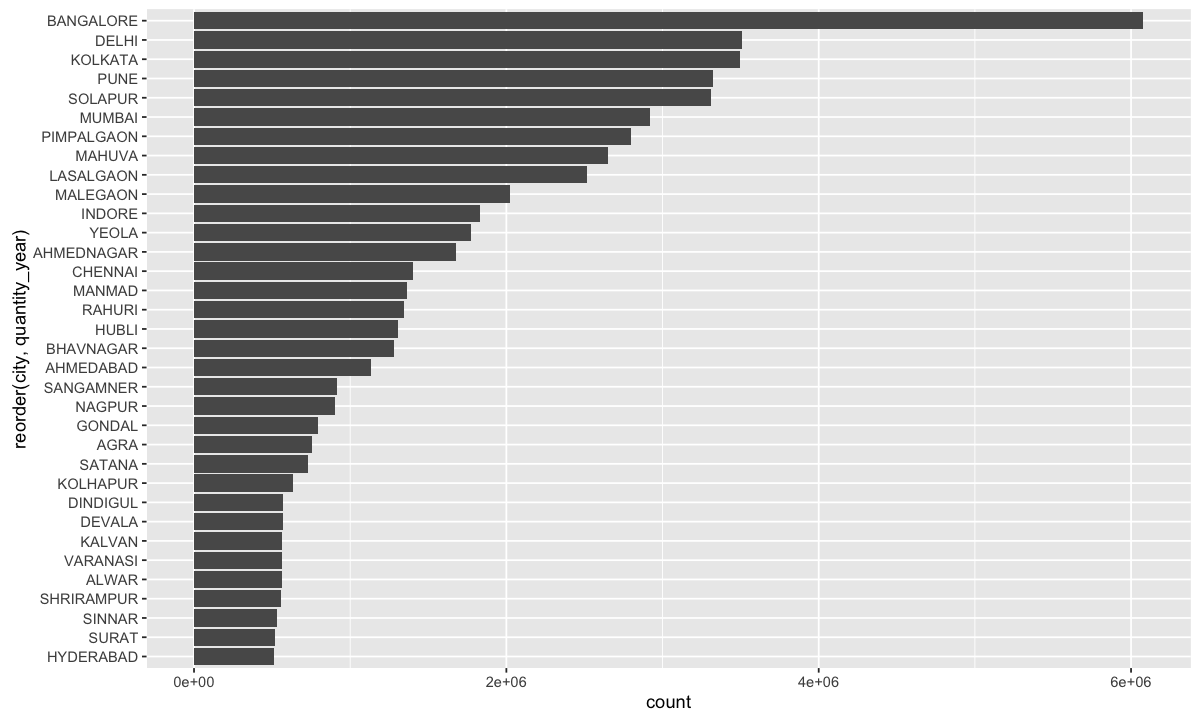

In [69]:
# Plot the Data
ggplot(df2010CitySmall) + aes(reorder(city, quantity_year), weight = quantity_year) + geom_bar() + coord_flip()

### Exercise: Show the State with Quantity Sales in 2015?

### Exercise: Show the State with Highest Price in 2015?

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [70]:
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,ABOHAR(PB),January,2005,2350,404,493,446,ABOHAR,PB,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,ABOHAR,PB,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,ABOHAR,PB,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,ABOHAR,PB,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,ABOHAR,PB,2013-01-01


In [71]:
dfBang <- df %>% filter(city == 'BANGALORE')

In [72]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01
2,BANGALORE,January,2005,335679,470,597,522,BANGALORE,KNT,2005-01-01
3,BANGALORE,January,2006,412185,286,617,537,BANGALORE,KNT,2006-01-01
4,BANGALORE,January,2007,268268,586,1167,942,BANGALORE,KNT,2007-01-01
5,BANGALORE,January,2008,393806,174,671,472,BANGALORE,KNT,2008-01-01
6,BANGALORE,January,2009,374380,848,1554,1328,BANGALORE,KNT,2009-01-01


In [73]:
summary(dfBang)

            market         month         year         quantity      
 BANGALORE     :147   February:13   Min.   :2004   Min.   :  63824  
 ABOHAR(PB)    :  0   January :13   1st Qu.:2007   1st Qu.: 329750  
 AGRA(UP)      :  0   March   :13   Median :2010   Median : 405716  
 AHMEDABAD(GUJ):  0   April   :12   Mean   :2010   Mean   : 523630  
 AHMEDNAGAR(MS):  0   August  :12   3rd Qu.:2013   3rd Qu.: 660674  
 AJMER(RAJ)    :  0   December:12   Max.   :2016   Max.   :1639032  
 (Other)       :  0   (Other) :72                                   
    priceMin         priceMax       priceMod            city         state    
 Min.   : 145.0   Min.   : 338   Min.   : 320   BANGALORE :147   KNT    :147  
 1st Qu.: 306.5   1st Qu.: 687   1st Qu.: 551   ABOHAR    :  0   AP     :  0  
 Median : 441.0   Median :1021   Median : 828   AGRA      :  0   ASM    :  0  
 Mean   : 555.2   Mean   :1312   Mean   :1041   AHMEDABAD :  0   BHR    :  0  
 3rd Qu.: 651.0   3rd Qu.:1612   3rd Qu.:1323   AHMED

In [74]:
# Set the index as date
dfBang <- dfBang %>% 
          arrange(date)
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01
2,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01
3,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01
4,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01
5,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01
6,BANGALORE,June,2004,311445,486,621,551,BANGALORE,KNT,2004-06-01


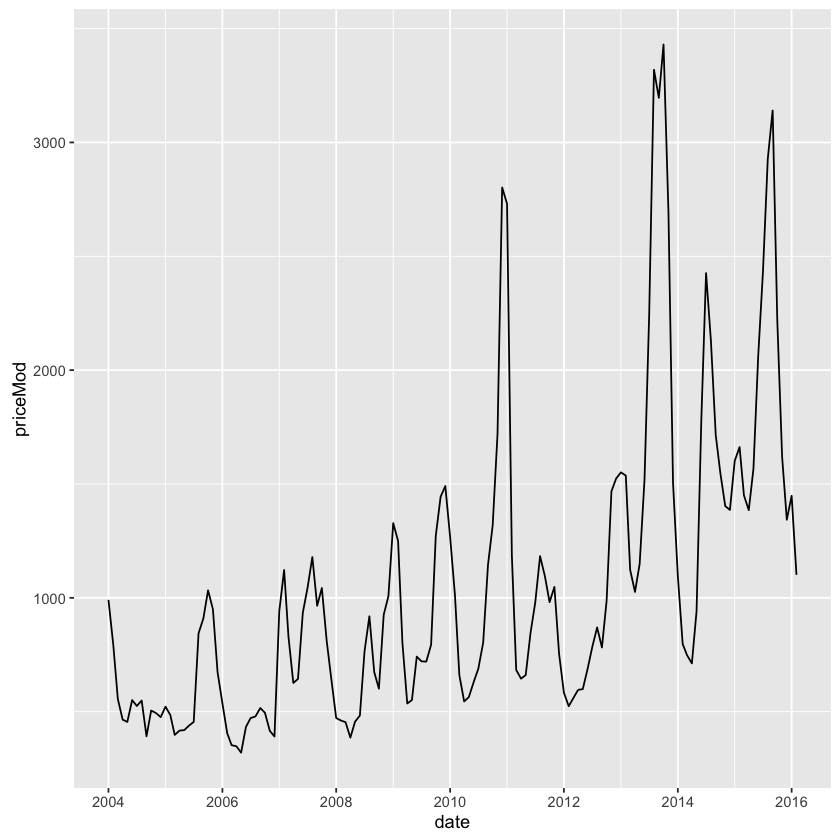

In [28]:
ggplot(dfBang) + aes(date, priceMod) + geom_line()

## PRINCIPLE: Convert from Wide format to Tall format using `gather`

Many times during exploration, we will need to convert the data frame from wide format to tall format (and vice versa).

![](img/wideformat.png)

In [75]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01
2,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01
3,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01
4,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01
5,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01
6,BANGALORE,June,2004,311445,486,621,551,BANGALORE,KNT,2004-06-01


In [76]:
library(tidyr)

In [77]:
dfBangTall <- dfBang %>%
              gather("priceType", "priceValue", 5:7)

In [78]:
head(dfBangTall)

,market,month,year,quantity,city,state,date,priceType,priceValue
1,BANGALORE,January,2004,227832,BANGALORE,KNT,2004-01-01,priceMin,916
2,BANGALORE,February,2004,225133,BANGALORE,KNT,2004-02-01,priceMin,741
3,BANGALORE,March,2004,221952,BANGALORE,KNT,2004-03-01,priceMin,527
4,BANGALORE,April,2004,185150,BANGALORE,KNT,2004-04-01,priceMin,419
5,BANGALORE,May,2004,137390,BANGALORE,KNT,2004-05-01,priceMin,400
6,BANGALORE,June,2004,311445,BANGALORE,KNT,2004-06-01,priceMin,486


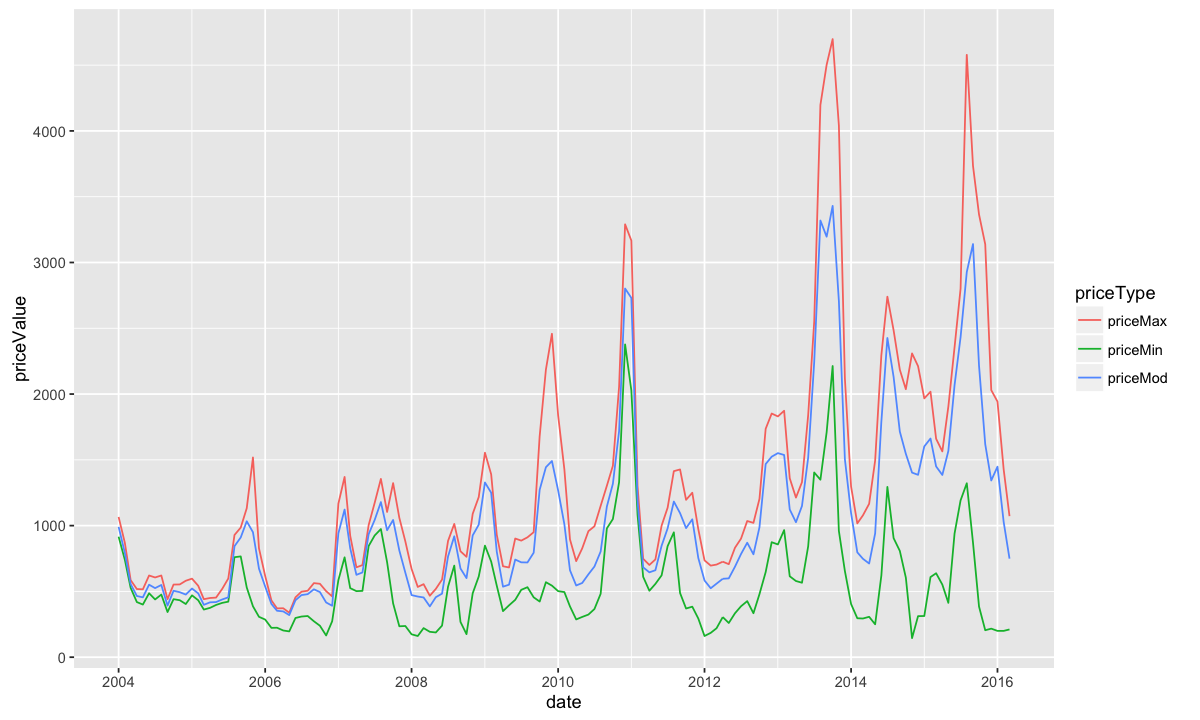

In [79]:
ggplot(dfBangTall) + aes(date, y = priceValue, color = priceType) + geom_line()

## PRINCIPLE: Create new variables using `mutate`

![](img/mutate.png)

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [80]:
dfBang <- dfBang %>% 
          mutate(priceDiff = priceMax - priceMin)

In [81]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date,priceDiff
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01,150
2,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01,129
3,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01,59
4,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01,99
5,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01,116
6,BANGALORE,June,2004,311445,486,621,551,BANGALORE,KNT,2004-06-01,135


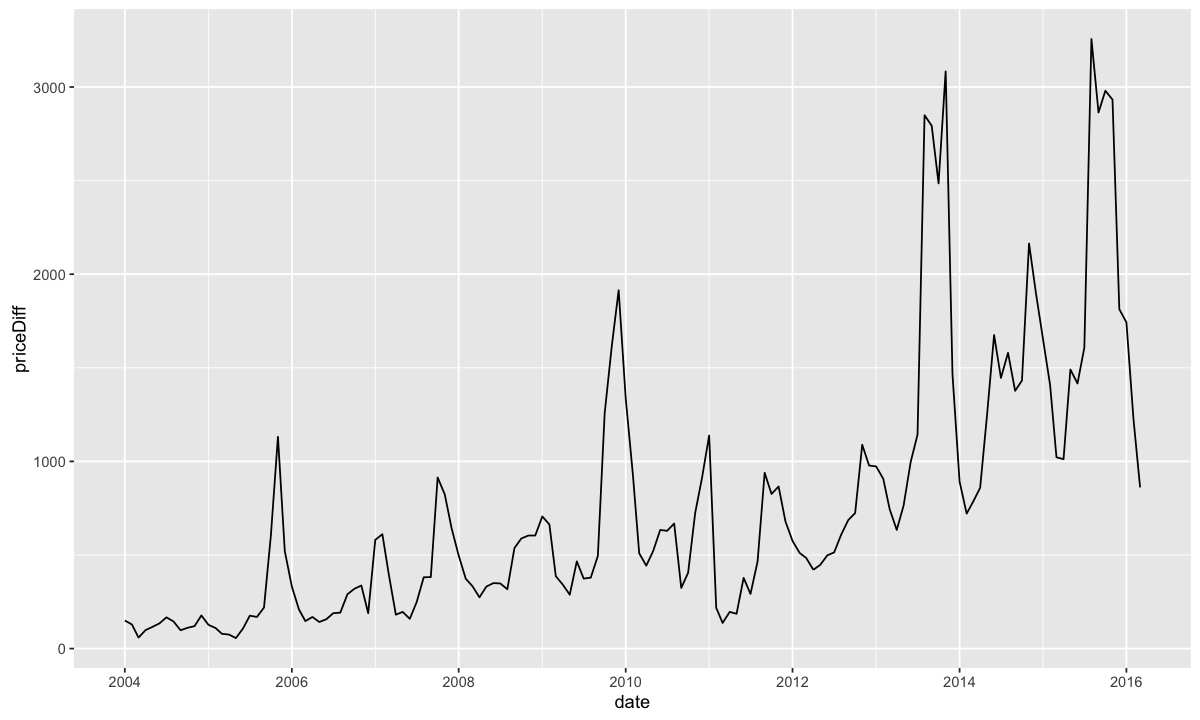

In [82]:
ggplot(dfBang) + aes(date, priceDiff) + geom_line()

## PRINCIPLE: Pivot Table

Pivot table is a way to summarize data frame data into rows, columns and value 

![](img/pivot.png)

In [83]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date,priceDiff
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01,150
2,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01,129
3,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01,59
4,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01,99
5,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01,116
6,BANGALORE,June,2004,311445,486,621,551,BANGALORE,KNT,2004-06-01,135


In [84]:
library(lubridate)

In [85]:
# Create new variable for Integer Month
dfBang <- dfBang %>%
          mutate(monthVal = month(date))

In [86]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date,priceDiff,monthVal
1,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01,150,1
2,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01,129,2
3,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01,59,3
4,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01,99,4
5,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01,116,5
6,BANGALORE,June,2004,311445,486,621,551,BANGALORE,KNT,2004-06-01,135,6


In [89]:
dfBangGroup <- dfBang %>%
               group_by(year, monthVal) %>% 
               summarize(priceDiff)

In [90]:
head(dfBangGroup)

,year,monthVal,priceDiff
1,2004,1,150
2,2004,2,129
3,2004,3,59
4,2004,4,99
5,2004,5,116
6,2004,6,135


In [91]:
str(dfBangGroup)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	147 obs. of  3 variables:
 $ year     : int  2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 ...
 $ monthVal : num  1 2 3 4 5 6 7 8 9 10 ...
 $ priceDiff: int  150 129 59 99 116 135 167 145 98 111 ...
 - attr(*, "vars")=List of 1
  ..$ : symbol year
 - attr(*, "drop")= logi TRUE


## PRINCIPLE: Convert from Tall format to Wide format using `spread`

Many times during exploration, we will need to convert the data frame from tall format to wide format.

![](img/tallformat.png)

In [92]:
dfBangPivot <- dfBangGroup %>%
               spread(monthVal, priceDiff)

In [93]:
dfBangPivot <- dfBang %>%
               group_by(year, monthVal) %>% 
               summarize(priceDiff) %>%
               spread(monthVal, priceDiff)

In [94]:
head(dfBangPivot)

,year,1,2,3,4,5,6,7,8,9,10,11,12
1,2004,150,129,59,99,116,135,167,145,98,111,120,177
2,2005,127,110,79,75,56,107,176,169,219,602,1131,521
3,2006,331,209,147,169,142,157,189,192,290,319,337,189
4,2007,581,611,398,181,196,159,248,381,382,914,824,643
5,2008,497,373,334,274,331,350,348,317,537,588,604,604
6,2009,706,663,387,341,288,466,374,379,495,1259,1616,1914


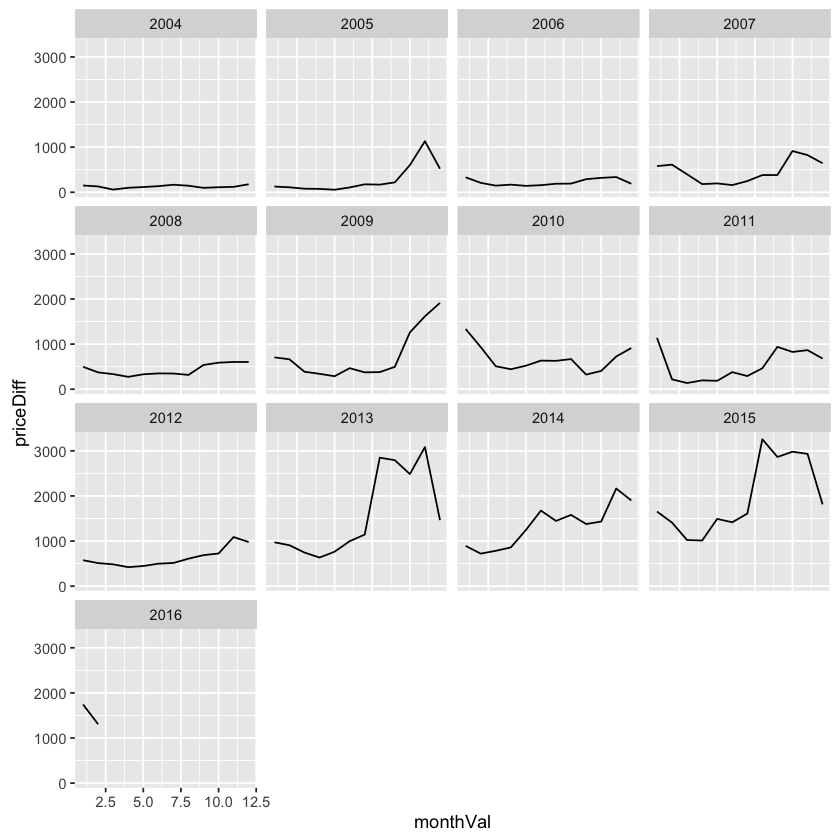

In [74]:
ggplot(dfBang) + aes(monthVal, priceDiff) + geom_line() + facet_wrap(~year)

### Exercise: Find the price variation for LASALGAON city? 